# Import python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score
from sklearn.metrics import recall_score,f1_score,roc_auc_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler
import math


import warnings
warnings.filterwarnings("ignore")

# Reading Dataset

In [2]:
df=pd.read_csv(r'C:\Users\win10\Downloads\archive (5)\Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# ANALYZING THE DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Missing value calculation

In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Displaying the Heat-Map

<Axes: >

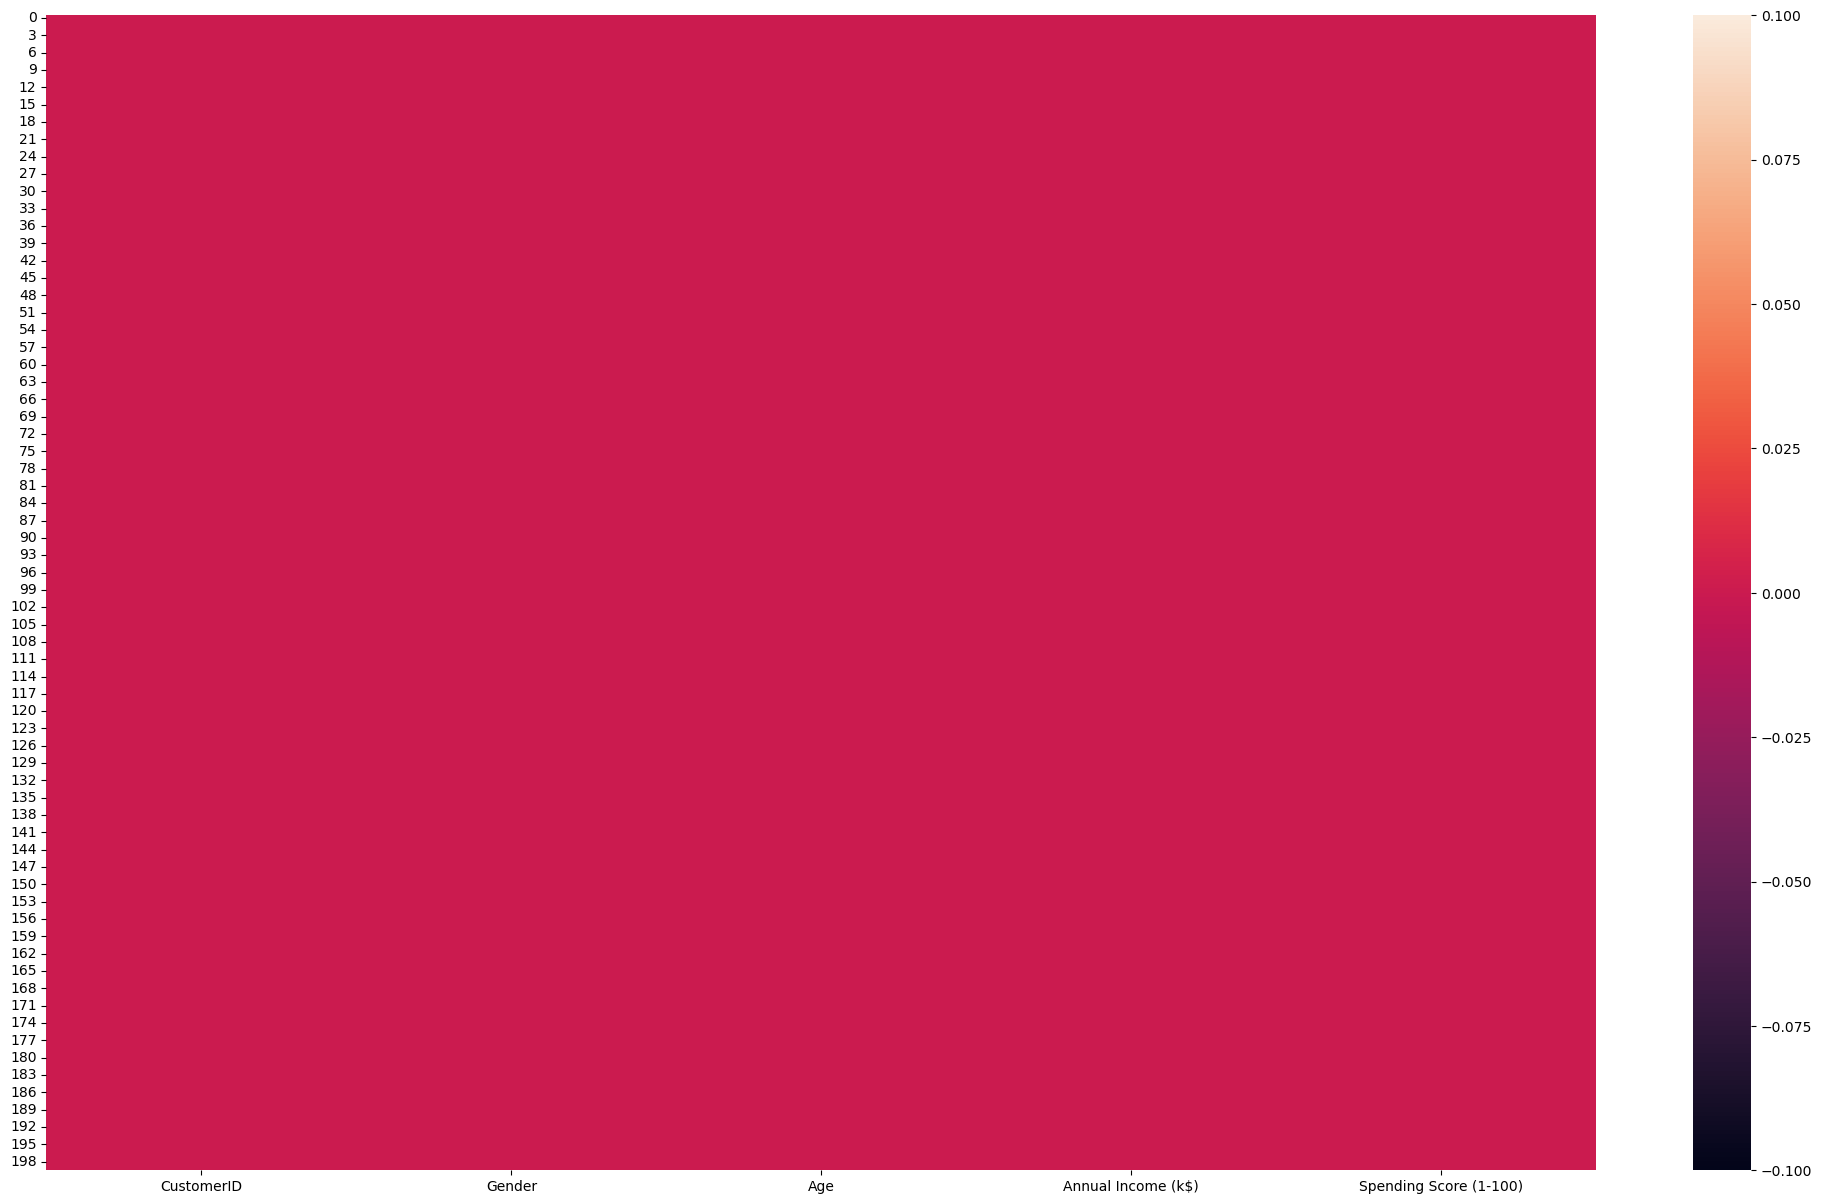

In [7]:
plt.figure(figsize=(25,15))
sns.heatmap(df.isnull())

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.nunique()

CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

# EDA

In [10]:
df_subset=df[['Gender','Age','Spending Score (1-100)']]

In [11]:
%matplotlib inline

Text(0.5, 1.0, "Histogram with pdf for feature 'Spending Score (1-100)' ")

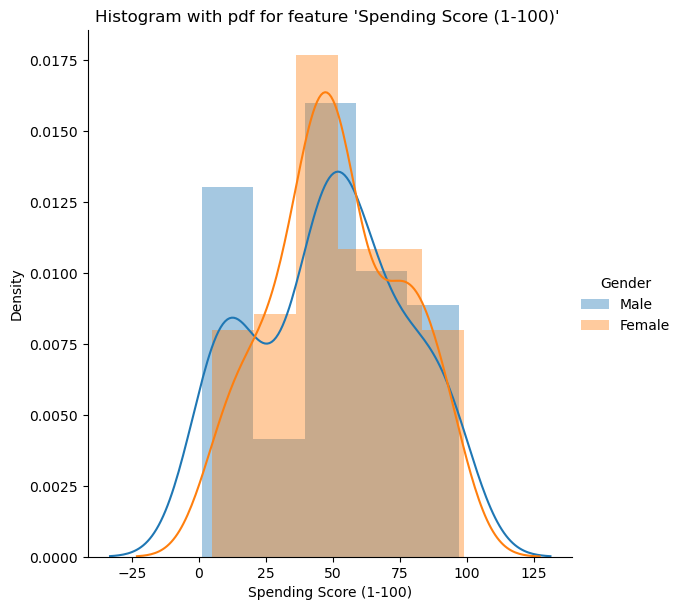

In [12]:
sns.FacetGrid(df_subset,hue='Gender',height=6).map(sns.distplot,'Spending Score (1-100)').add_legend()
plt.title("Histogram with pdf for feature 'Spending Score (1-100)' ")

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

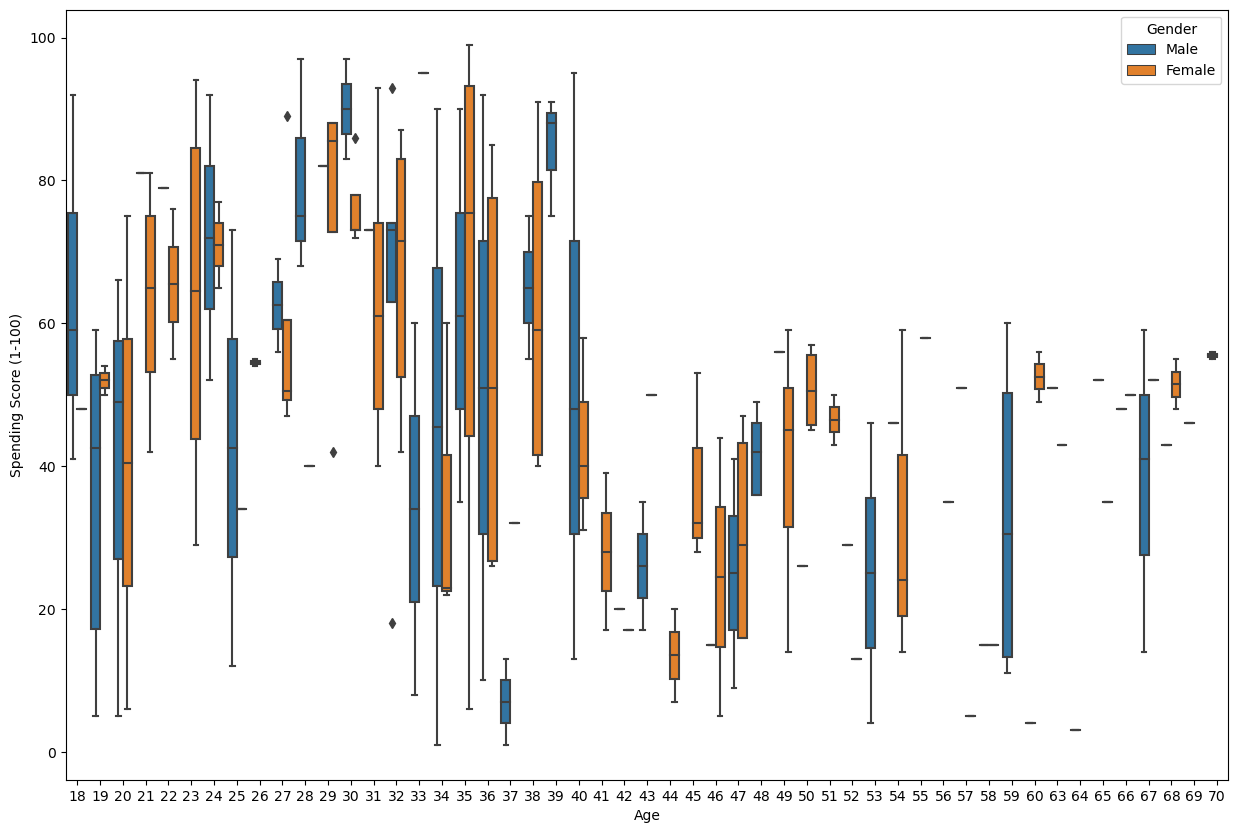

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_subset,x='Age', y='Spending Score (1-100)',hue='Gender')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

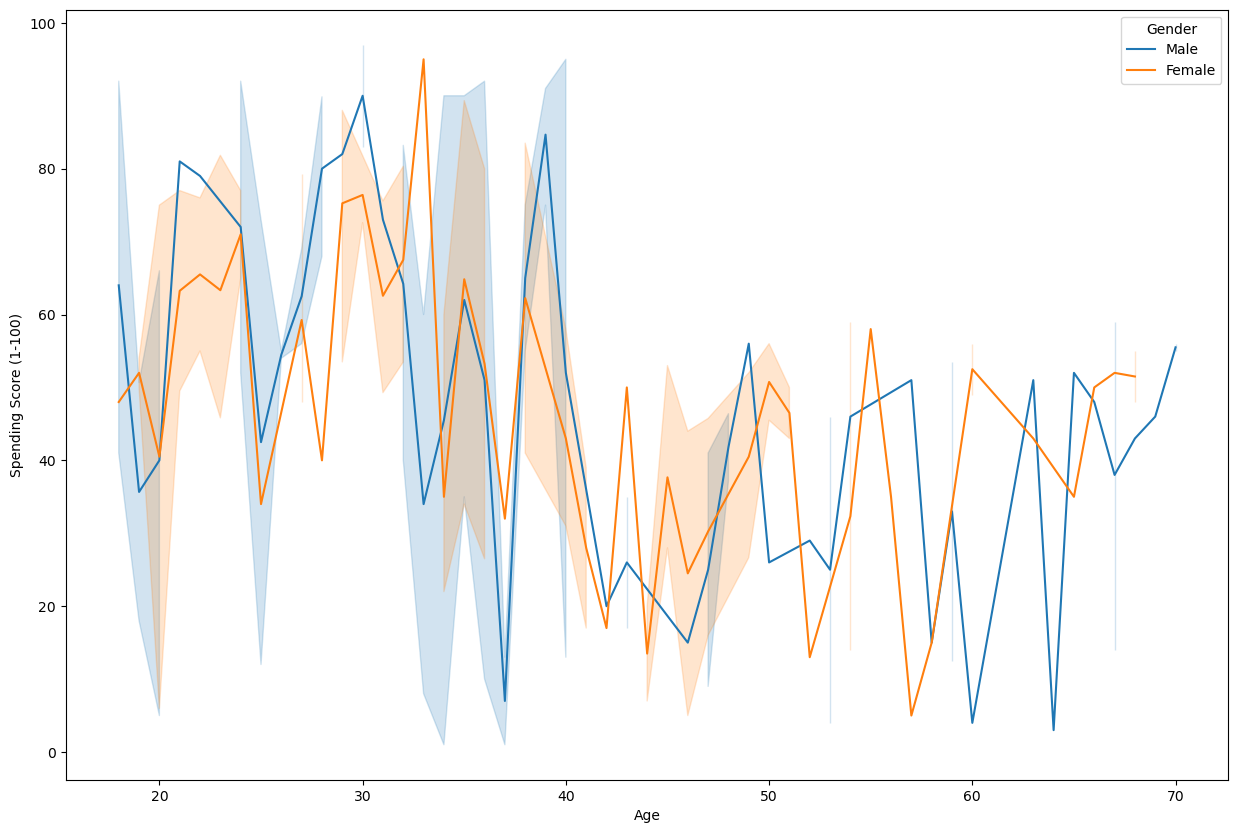

In [14]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_subset,x='Age', y='Spending Score (1-100)',hue='Gender')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

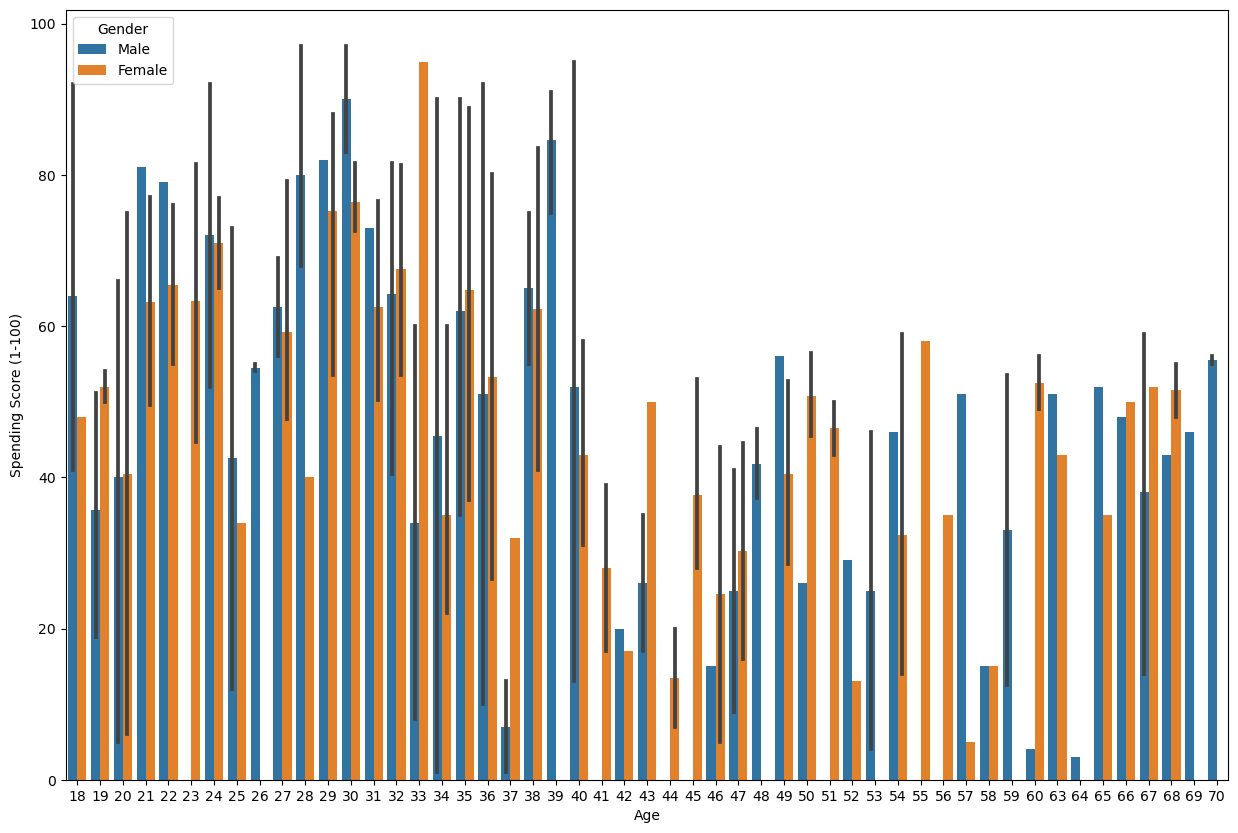

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(data=df_subset,x='Age', y='Spending Score (1-100)',hue='Gender')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

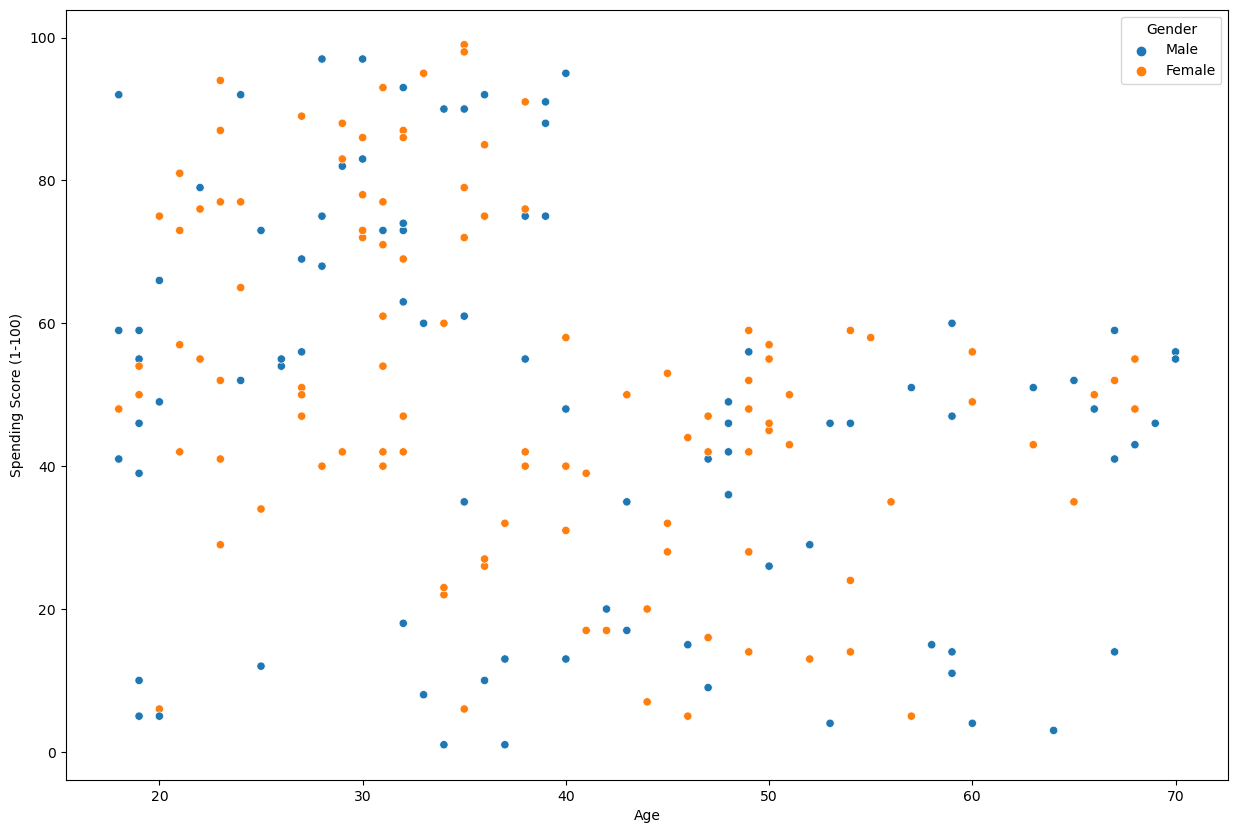

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_subset,x='Age', y='Spending Score (1-100)',hue='Gender')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

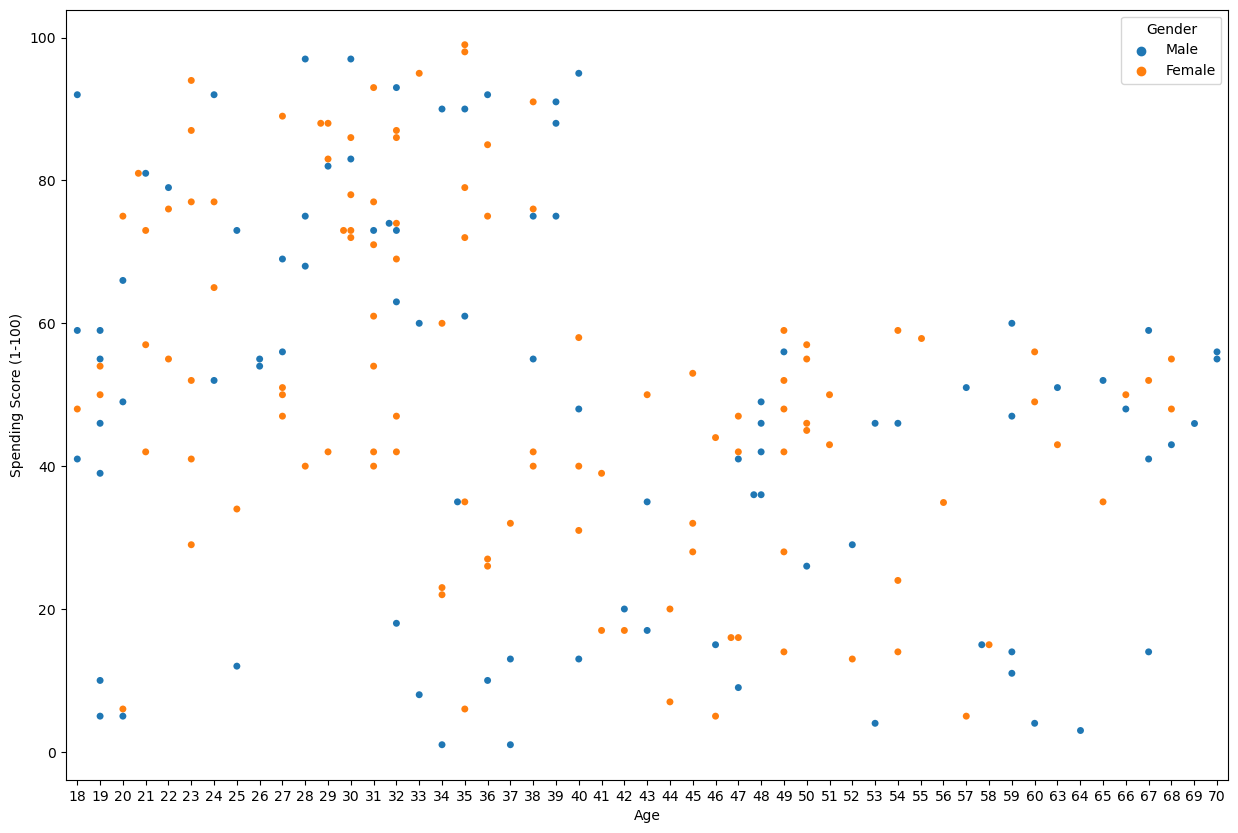

In [17]:
plt.figure(figsize=(15,10))
sns.swarmplot(data=df_subset,x='Age', y='Spending Score (1-100)',hue='Gender')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

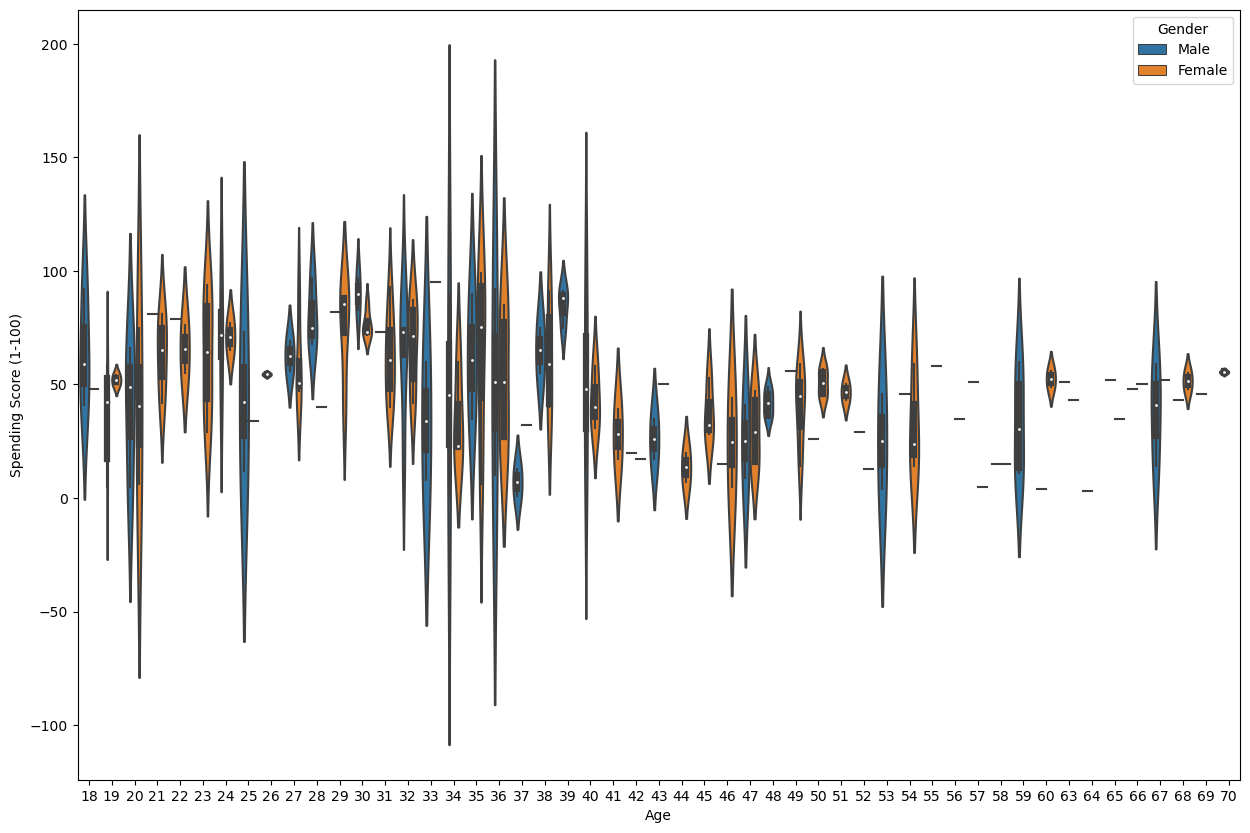

In [18]:
plt.figure(figsize=(15,10))
sns.violinplot(data=df_subset,x='Age', y='Spending Score (1-100)',hue='Gender')

# KMEANS CLUSTERING

In [19]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [20]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

In [21]:
x=df[['Age','Annual Income (k$)','Spending Score (1-100)','Gender']]

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

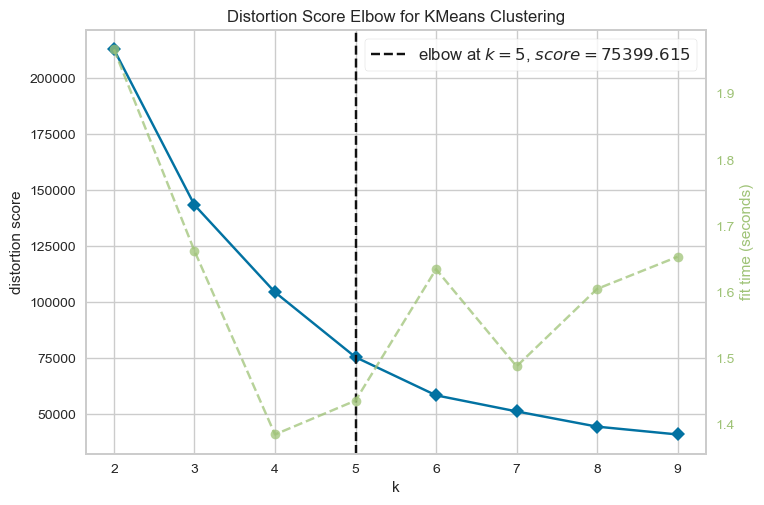

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
km=KMeans()
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()

In [24]:
model=KMeans(5)

In [25]:
model=model.fit(x)

In [26]:
tahmin=model.predict(x)

In [27]:
x['Cluster']=tahmin

In [28]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,Cluster
0,19,15,39,0,1
1,21,15,81,0,4
2,20,16,6,1,1
3,23,16,77,1,4
4,31,17,40,1,1


In [29]:
x['Cluster'].value_counts()

Cluster
0    79
3    39
2    36
1    23
4    23
Name: count, dtype: int64

# Hierarchical Clustering

In [30]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [31]:
data=linkage(x,method='ward',metric='euclidean')

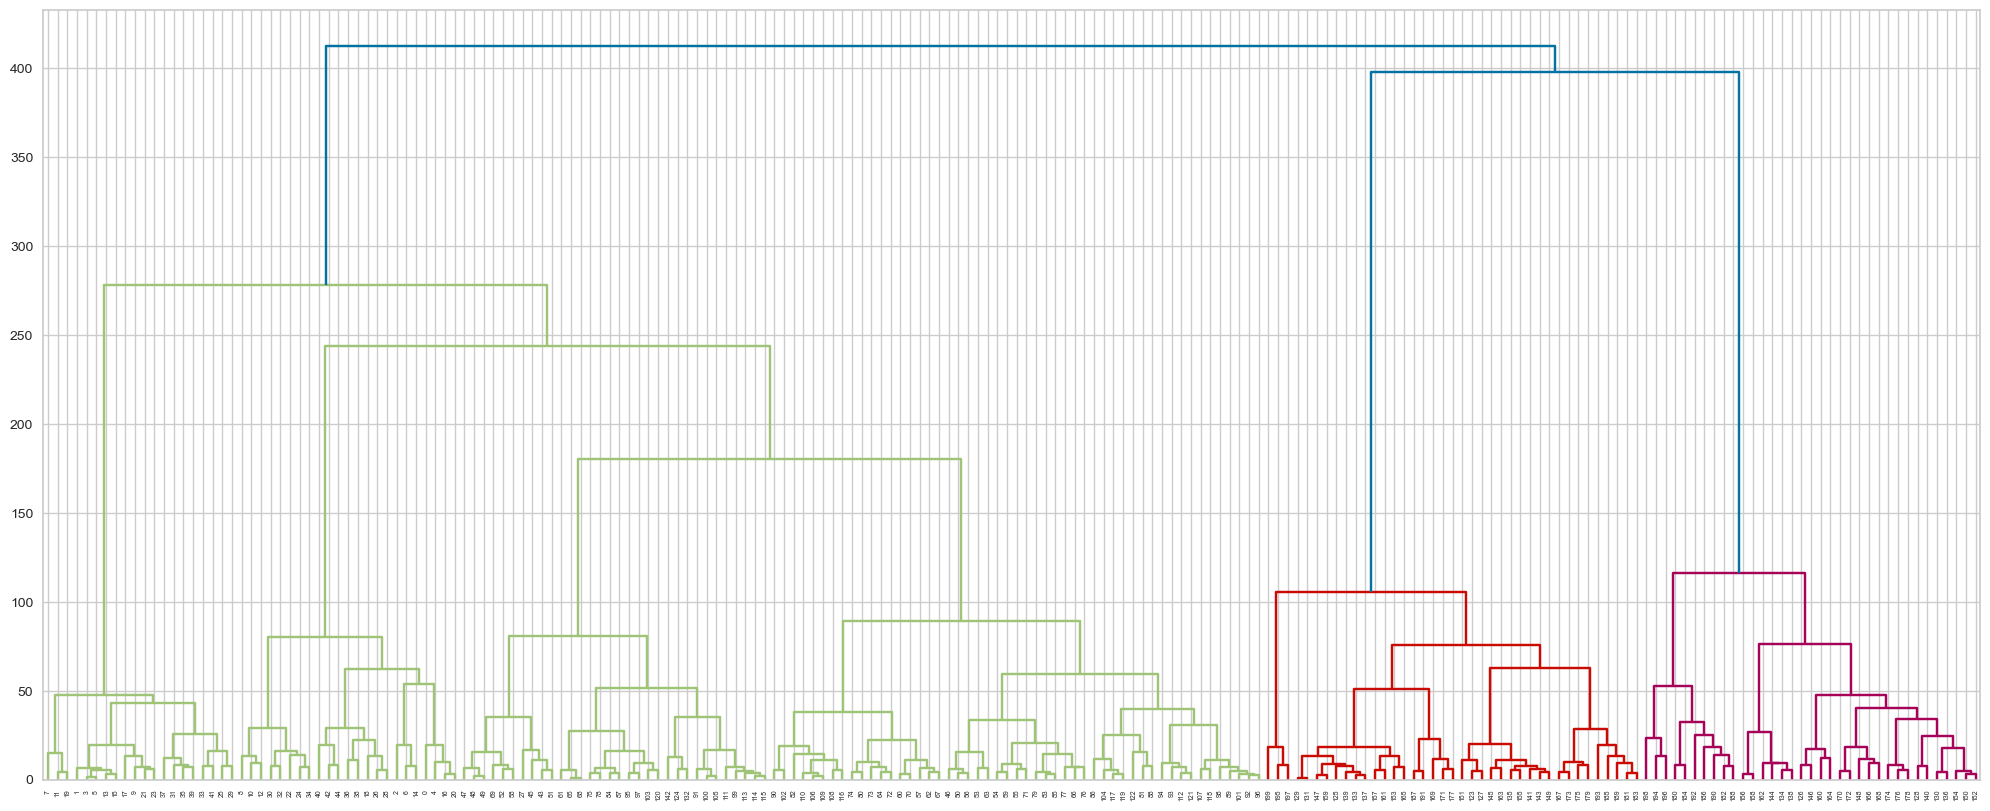

In [32]:
plt.figure(figsize=(25,10))
dendrogram(data);